In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
apps = pd.read_csv('googleplaystore.csv')

In [3]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


So, our dataset consists of  13 features describing each app on the dataset. Some features such as `Rating` have a lot of missing values. All the features are strings but that's not right for all the columns while some of them describing numerical values.

Let's take a look at each column and try to find interesting results

### APP

In [5]:
len(apps['App'].unique())

9660

Out of the 10841 entries, only the 9660 are unique apps, we have to examine this further because if we continue as it is we will be working with duplicates in our dataset and our findings won't be so reliable.

In [6]:
apps.groupby('App').count()[apps.groupby('App').count()['Category'] != 1]['Category'].tail()

App
stranger chat - anonymous chat                        2
textPlus: Free Text & Calls                           2
theScore: Live Sports Scores, News, Stats & Videos    5
trivago: Hotels & Travel                              3
wetter.com - Weather and Radar                        2
Name: Category, dtype: int64

In [7]:
apps[apps['App'] == 'theScore: Live Sports Scores, News, Stats & Videos']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up


Ok, we found all the double apps and as it seems they are exact copies of the same app, we have definitely to drop the double entries. With this method, we came up with a dataset cleaner already and smaller

In [8]:
apps_clean = apps.drop_duplicates(subset='App')
apps_clean.shape

(9660, 13)

### CATEGORY



In [9]:
(apps_clean['Category'].unique())

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Here we see that one category seems to have an uncommon name "1.9" we have to investigate that further, other than that we have nice and organized categories

In [10]:
apps_clean[apps_clean['Category'] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Ok only one APP within this category, we can easily delete this entry

In [11]:
apps_clean = apps_clean.drop(index=10472)

In [12]:
assert len(apps_clean[apps_clean['Category'] == "1.9"]) == 0

### RATING

This feature is numerical, we take a look and see if we have any anomalies. We wait for all the values to be between 0 - 5 stars, this is the norm of rating an app in google play store.

In [13]:
apps_clean.describe()

,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


We have a min of 1 and a max of 5,  nothing strange here, we will make a further analysis later in this notebook. Now let's check how many apps have no rating.

In [14]:
apps_clean.Rating.isnull().sum()

1463

1463 apps have no rating at all, that's a little bit strange. After we have all the data in the final format we can investigate that further

### Reviews

This feature is in text format but it represents numerical values

In [15]:
apps_clean.Reviews = pd.to_numeric(apps_clean.Reviews)

In [16]:
apps_clean.Reviews.describe()

count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

The values are parsed in numeric format and as we can see the min and max values are way out of the same range

### Size

The size of the app is a numeric value too but is parsed as a string. We can turn them into numbers but we have another problem here, some of the apps are into Megabytes and some are into Kilobytes, plus there are apps that have no size. We can leave it as it is or we can make a function that looks the last letter and if it is MB it stays so if it is KB we turn it into megabytes by dividing with 1024.

In [17]:
def size_converter(data):
    if data[-1] == 'M':
        return float(data[:-1])
    elif data[-1] == 'k':
        return float(data[:-1]) / 1024
    else:
        return 0
    

In [18]:
apps_clean['Size'] = apps_clean['Size'].apply(size_converter)

In [19]:
apps_clean['Size'].describe()

count    9659.000000
mean       17.804097
std        21.495518
min         0.000000
25%         2.900000
50%         9.100000
75%        25.000000
max       100.000000
Name: Size, dtype: float64

We have done the hard work and now we see that this feature is in numeric format, the min value raises some questions while the size of 0 Mb is something to think about,  we assume that the app is too small. The max is 100 Mb lets see which app is that. Other than that apps have a normal size distribution.

In [20]:
apps_clean[apps_clean['Size'] == 100 ].groupby('Category')['Size'].count().sort_values(ascending = False)

Category
GAME                  6
SPORTS                2
FAMILY                2
MEDICAL               1
LIFESTYLE             1
HEALTH_AND_FITNESS    1
FINANCE               1
Name: Size, dtype: int64

Ok most of the apps are games something that is normal for games to have such a big size

### Installs

In [21]:
apps_clean['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

This time we have again numerical values as text but the meaning is kind of abstract. We don't have an exact number but we have a group of values which our app is in. We can either make groups or convert all entries in numbers. 

I decide to go on  using this feature as categorical, but I will change some things, I will make a new category 100- and I will put in all the apps with less 100 installations

In [22]:
def installs(data):
    x = data.split('+')[0]
    try:
        if int(x) <= 100:
            return '100-'
        else:
             return data
    except ValueError:
        return data

In [23]:
apps_clean['Installs'] = apps_clean['Installs'].apply(installs)

### Type

In [24]:
apps_clean['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [25]:
apps_clean[apps_clean['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,0.0,100-,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [26]:
apps_clean.drop(index=9148, inplace=True)

### Price

In [27]:
apps_clean['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

The prices seem to be either 0 for free apps and a dollar value for the paid ones. we can make this values numeric

In [28]:
def price_converter(price):
    try:
        return float(price.split('$')[1])
    except IndexError:
        return float(price)

In [29]:
apps_clean['Price'] = apps_clean['Price'].apply(price_converter)

In [30]:
apps_clean['Price'].describe()

count    9658.000000
mean        1.099413
std        16.853021
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Ok we have to see which app cost so much money

In [31]:
apps_clean[apps_clean['Price'] == 400.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,"10,000+",Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


Ok, a simple search in app store shoes as that this app is something like a way to prove you have money to spend, interesting.

In [32]:
apps_clean[apps_clean['Price'] > 100].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5,100-,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up


Another filter in the dataset we see more apps as the first one!!!

### Content Rating

In [33]:
apps_clean['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Ok a simple feature, nothing to do here yet

### Genres

In [34]:
apps_clean['Genres'].nunique()

118

118 unique app genres, I want to make a comparison with Category to see what's different

In [35]:
apps_clean[['Category', 'Genres']][:15]

,Category,Genres
0,ART_AND_DESIGN,Art & Design
1,ART_AND_DESIGN,Art & Design;Pretend Play
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
5,ART_AND_DESIGN,Art & Design
6,ART_AND_DESIGN,Art & Design
7,ART_AND_DESIGN,Art & Design
8,ART_AND_DESIGN,Art & Design
9,ART_AND_DESIGN,Art & Design;Creativity


Ok it seems that we have the same values here, the Genre column seems to have sometimes more than one entry to explain where the app belongs, but for the simplicity, we can drop the feature as we have already something similar to go with.

In [36]:
apps_clean.drop('Genres', axis=1, inplace=True)

### Last Updated

In [37]:
apps_clean['Last Updated'].describe()

count               9658
unique              1377
top       August 3, 2018
freq                 252
Name: Last Updated, dtype: object

Ok here we have dates, we can easy to convert the text format as a date.

In [38]:
apps_clean['Last Updated'] = pd.to_datetime(apps_clean['Last Updated'])

In [39]:
apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 12 columns):
App               9658 non-null object
Category          9658 non-null object
Rating            8196 non-null float64
Reviews           9658 non-null int64
Size              9658 non-null float64
Installs          9658 non-null object
Type              9658 non-null object
Price             9658 non-null float64
Content Rating    9658 non-null object
Last Updated      9658 non-null datetime64[ns]
Current Ver       9650 non-null object
Android Ver       9656 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 980.9+ KB


Ok now the column is converted and we can work better with dates type format

### Current Ver

In [40]:
apps_clean['Current Ver'].nunique()

2817

We have 2817 unique versions for each app. This feature has actually of no importance for our analysis 

### Android Ver

In [42]:
apps_clean['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

This feature describes the versions of the android needs our phone for this app to work without a problem. Like the previous feature, we don't need this information for our further analysis.

In [44]:
apps_clean.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)

# PLOT

In [45]:
apps_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,2018-06-20


### What is the rating distribution?

In [55]:
plt.rcParams["figure.figsize"] = (10, 5)

Text(0.5,0,'Rating(in stars)')

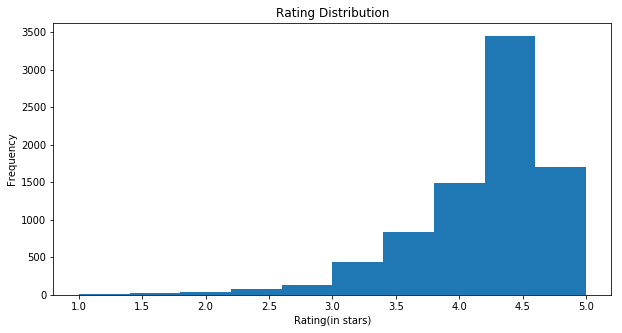

In [57]:
apps_clean['Rating'].plot(kind='hist');
plt.title('Rating Distribution')
plt.xlabel('Rating(in stars)')

Our plot shows that more apps ratted around 4.2 - 4.3 stars and only a few of them (< 500 apps) have less than 3 stars

### How rating and category are related?

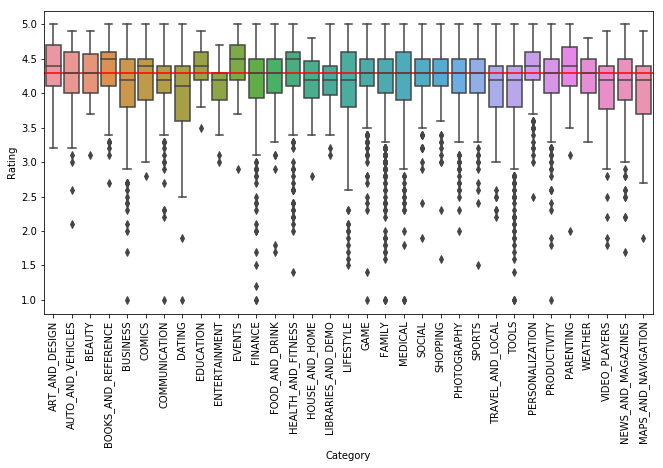

In [70]:
sns.boxplot(y='Rating', x='Category',data=apps_clean)
plt.tight_layout()
plt.xticks(rotation='vertical')

plt.axhline(apps_clean.Rating.median(), color='red')

More of the apps have good ratings but what is interesting is the outliers which show apps only in some of the categories. This can explain a user behavior such as when a user downloads an app without reading the description or without knowing what this app is about only to be disappointed after installation and give a bad rate, while other users download the same app knowing what this app is about and give the app a better rare. In contrast, we see app categories having less or no outliers, that make the app more robust and maybe the name of the app is not misleading in comparison of what the apps do.

Let's see some examples: How rating and category are related?

For example, the `ART_AND_DESIGN` category has no outliers while the `TOOLS` category has more

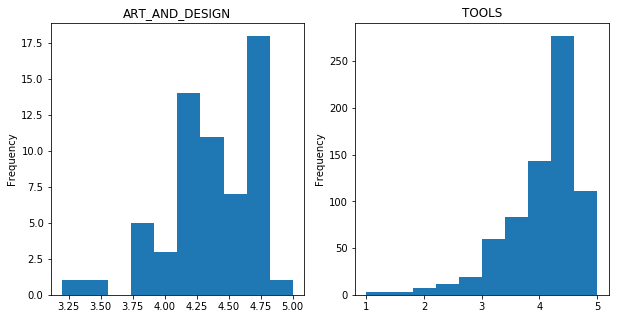

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex='col')
apps_clean[apps_clean['Category'] == 'ART_AND_DESIGN']['Rating'].plot(kind='hist', ax=axes[0])
apps_clean[apps_clean['Category'] == 'TOOLS']['Rating'].plot(kind='hist', ax=axes[1])

axes[0].title.set_text('ART_AND_DESIGN')
axes[1].title.set_text('TOOLS')

In [103]:
apps_clean[apps_clean['Category'] == 'ART_AND_DESIGN']['App'][10:20]

10                            Text on Photo - Fonteee
11            Name Art Photo Editor - Focus n Filters
12                     Tattoo Name On My Photo Editor
13                              Mandala Coloring Book
14    3D Color Pixel by Number - Sandbox Art Coloring
15                    Learn To Draw Kawaii Characters
16       Photo Designer - Write your name with shapes
17                           350 Diy Room Decor Ideas
18                      FlipaClip - Cartoon animation
19                                       ibis Paint X
Name: App, dtype: object

In [105]:
apps_clean[apps_clean['Category'] == 'TOOLS']['App'][10:20]

3244                                      Account Manager
3245                                              myMetro
3246                                         File Manager
3247                                            My Telcel
3248    Calculator - free calculator, multi calculator...
3249                                  ASUS Sound Recorder
3250                                   iWnn IME for Nexus
3251      Samsung Max - Data Savings & Privacy Protection
3252                            Android TV Remote Service
3253                                           ZenUI Help
Name: App, dtype: object

Ok, we see that first category has a more robust rating but it has fewer ratings in total, looking in the apps name in this category we see maybe better app names. The other category has more ratings in total but has a lot of outliers and looking into the app names we see more complex names.

### Which category has the fewer stars rating?

In [118]:
apps_clean.groupby('Category')['Rating'].mean().sort_values()

Category
DATING                 3.970149
MAPS_AND_NAVIGATION    4.036441
TOOLS                  4.039554
VIDEO_PLAYERS          4.044595
TRAVEL_AND_LOCAL       4.069519
LIFESTYLE              4.093355
BUSINESS               4.098479
FINANCE                4.115563
COMMUNICATION          4.121484
NEWS_AND_MAGAZINES     4.121569
ENTERTAINMENT          4.135294
HOUSE_AND_HOME         4.150000
PHOTOGRAPHY            4.157414
MEDICAL                4.166552
FOOD_AND_DRINK         4.172340
LIBRARIES_AND_DEMO     4.178125
FAMILY                 4.179664
COMICS                 4.181481
PRODUCTIVITY           4.183389
AUTO_AND_VEHICLES      4.190411
SPORTS                 4.216154
SHOPPING               4.230000
HEALTH_AND_FITNESS     4.243033
WEATHER                4.243056
SOCIAL                 4.247291
GAME                   4.247368
BEAUTY                 4.278571
PARENTING              4.300000
PERSONALIZATION        4.332215
BOOKS_AND_REFERENCE    4.344970
ART_AND_DESIGN         4.357377

Ok it seems that the `DATE` category is the Category that receives the worsts ratings, while the `EVENTS` category has better ratings

### Which app updated latest and which is the oldest?

In [119]:
apps_clean['Last Updated'].describe()

count                    9658
unique                   1377
top       2018-08-03 00:00:00
freq                      252
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

Ok there is an app that has to be updated from 2010

In [123]:
apps_clean[apps_clean['Last Updated'] == '2010-05-21 00:00:00']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
7479,FML F*ck my life + widget,FAMILY,4.2,1415,0.204102,"100,000+",Free,0.0,Everyone,2010-05-21
